-------- Wavelet transformation of image ---------
2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


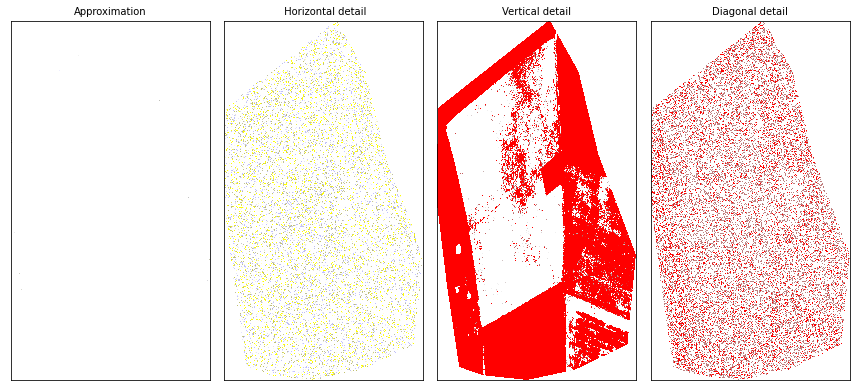

In [1]:
import numpy as np
import matplotlib.image as mping
import matplotlib.pyplot as plt
import pywt
import pywt.data
from osgeo import gdal


# Load image
path =  r'D:/cbr/VP2/VP2_SoilMapping/CodeOutput/output_file_rgb.tif'
dataset = gdal.Open(path) 
b1 = dataset.GetRasterBand(1).ReadAsArray()
b2 = dataset.GetRasterBand(2).ReadAsArray()
b3 = dataset.GetRasterBand(3).ReadAsArray()
original = np.dstack((b1, b2, b3))
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
print('-------- Wavelet transformation of image ---------')
coeffs2 = pywt.dwt2(original, 'bior1.3')
print(len(coeffs2))
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 12))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()


-------- Wavelet transformation of image ---------
[array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=flo

TypeError: Invalid shape (1, 6442, 7126, 3) for image data

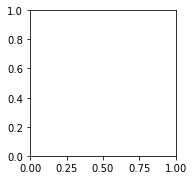

In [79]:
print('-------- Wavelet transformation of image ---------')
C = pywt.wavedec2(original, 'bior1.3', mode ='periodization')
coeffs = pywt.wavedec2(C, 'bior1.3', mode ='periodization')
imgr = np.uint8(coeffs)
cA2 = C[0]
LL= coeffs[-1]
print(coeffs)
fig = plt.figure(figsize=(12, 12))
for i, a in enumerate([LL, LH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [12]:
import cv2
import numpy as np

hsv = cv2.cvtColor(original, cv2.COLOR_BGR2HSV)

original = cv2.GaussianBlur(hsv,(3,3),0)
     
# Calculation of Sobelx
sobelx = cv2.Sobel(original,cv2.CV_64F,1,0,ksize=5)
 
# Calculation of Sobely
sobely = cv2.Sobel(original,cv2.CV_64F,0,1,ksize=5)
 
# Calculation of Laplacian
laplacian = cv2.Laplacian(original,cv2.CV_64F).astype(np.uint8)
 
#cv2.imshow('sobelx',sobelx)
#cv2.imshow('sobely',sobely)
#cv2.imshow('laplacian',laplacian)




error: OpenCV(4.5.3) C:/Users/runneradmin/AppData/Local/Temp/pip-req-build-sn_xpupm/opencv/modules/imgproc/src/filter.simd.hpp:3175: error: (-213:The function/feature is not implemented) Unsupported combination of source format (=21), and destination format (=22) in function 'cv::opt_AVX2::getLinearFilter'


In [ ]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax1.imshow(sobelx)

ax2 = fig.add_subplot(222)
ax2.imshow(sobely)

ax3 = fig.add_subplot(223)
ax3.imshow(laplacian)

plt.show()